**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage", 
    "*",
    "fcc_starrmpracrispri_vote2",
    "summary"
)
txt_fname = "region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_umap_cluster_by_coverage/fcc_astarr_macs_input_overlap/fcc_starrmpracrispri_vote2/summary/region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_umap_cluster_by_coverage/fcc_astarr_macs_input_union/fcc_starrmpracrispri_vote2/summary/region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv 


In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "*",
    "summary"
)
txt_fname = "region.annotation.encode_chromatin_states.chromhmm.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_chromatin_states.chromhmm.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.encode_chromatin_states.chromhmm.tsv 


## Import data

**Import region pairs**

In [6]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "analysis_umap_cluster_by_coverage", 
        txt_folder,
        "fcc_starrmpracrispri_vote2",
        "summary"
    )
    txt_fname = "region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_umap_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 33953     6

$fcc_astarr_macs_input_union
[1] 39788     6



Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031


In [7]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    txt_fname = "region.annotation.encode_chromatin_states.chromhmm.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 220966     11

$fcc_astarr_macs_input_union
[1] 343434     11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Note,Group,Label,Region_Annot,Region_Count
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,encode_chromhmm_ENCFF106BGJ,ChromHMM:Quies,ChromHMM,Quies,chr1:0-16000,1
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,encode_chromhmm_ENCFF106BGJ,ChromHMM:Quies,ChromHMM,Quies,chr1:0-16000,1
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,encode_chromhmm_ENCFF106BGJ,ChromHMM:Quies,ChromHMM,Quies,chr1:16200-17400,1


## Arrange table

In [8]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get tables
    dat_region_umap  = lst_dat_region_umap_import[[txt_folder]]
    dat_region_annot = lst_dat_region_annot_import[[txt_folder]]

    ### arrange annotation labels
    dat = dat_region_annot
    dat = dat %>% dplyr::select(Region, Group, Label, Note)
    dat_region_annot_arrange = dat
    
    ### join tables
    dat = dplyr::left_join(
        dat_region_umap,
        dat_region_annot_arrange,
        by = "Region"
    )
    return(dat)
})

### assign and show
lst_dat_region_merge = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 65887     9

$fcc_astarr_macs_input_union
[1] 78928     9



Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2,Group,Label,Note
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927,ChromHMM,Tss,ChromHMM:Tss
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927,ChromHMM,TssFlnkU,ChromHMM:TssFlnkU
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063,ChromHMM,Tss,ChromHMM:Tss


## Explore: UMAP labeled with annotation

In [9]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_umap_import
dat = lst[[idx]]

dat_region_umap = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 33953     6


Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031
chr1,100265562,100266994,chr1:100265562-100266994,7.761321,5.706240
chr1,10032429,10033763,chr1:10032429-10033763,9.426987,4.859900
chr1,100351018,100353268,chr1:100351018-100353268,7.974018,5.128401


In [10]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_merge
dat = lst[[idx]]

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 65887     9


Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2,Group,Label,Note
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927,ChromHMM,Tss,ChromHMM:Tss
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927,ChromHMM,TssFlnkU,ChromHMM:TssFlnkU
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063,ChromHMM,Tss,ChromHMM:Tss
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063,ChromHMM,TssFlnkU,ChromHMM:TssFlnkU
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031,ChromHMM,Enh1,ChromHMM:Enh1
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031,ChromHMM,Tss,ChromHMM:Tss


In [30]:
dat = dat_region_merge
vec = unique(dat$Label)
print(vec)

 [1] "Tss"      "TssFlnkU" "Enh1"     "TssFlnk"  "TssFlnkD" "Enh2"    
 [7] "Quies"    "TxWk"     "EnhG2"    "EnhG1"    "Biv"      "ReprPC"  
[13] "ZNF/Rpts" "Het"      "Tx"      


In [32]:
dat = dat_region_merge
lst = split(dat, dat$Label)

### assign and show
lst_dat_region_merge = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$Biv
[1] 3641    9

$Enh1
[1] 4999    9

$Enh2
[1] 5469    9

$EnhG1
[1] 1097    9

$EnhG2
[1] 1271    9

$Het
[1] 369   9

$Quies
[1] 9120    9

$ReprPC
[1] 4474    9

$Tss
[1] 8229    9

$TssFlnk
[1] 2763    9

$TssFlnkD
[1] 4895    9

$TssFlnkU
[1] 9812    9

$Tx
[1] 984   9

$TxWk
[1] 8340    9

$`ZNF/Rpts`
[1] 424   9



Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2,Group,Label,Note
chr1,10638212,10638532,chr1:10638212-10638532,-0.1024969,3.366121,ChromHMM,Biv,ChromHMM:Biv
chr1,10666626,10667177,chr1:10666626-10667177,-0.1270071,4.167501,ChromHMM,Biv,ChromHMM:Biv
chr1,10721672,10722093,chr1:10721672-10722093,0.8009318,4.986177,ChromHMM,Biv,ChromHMM:Biv


## Explore

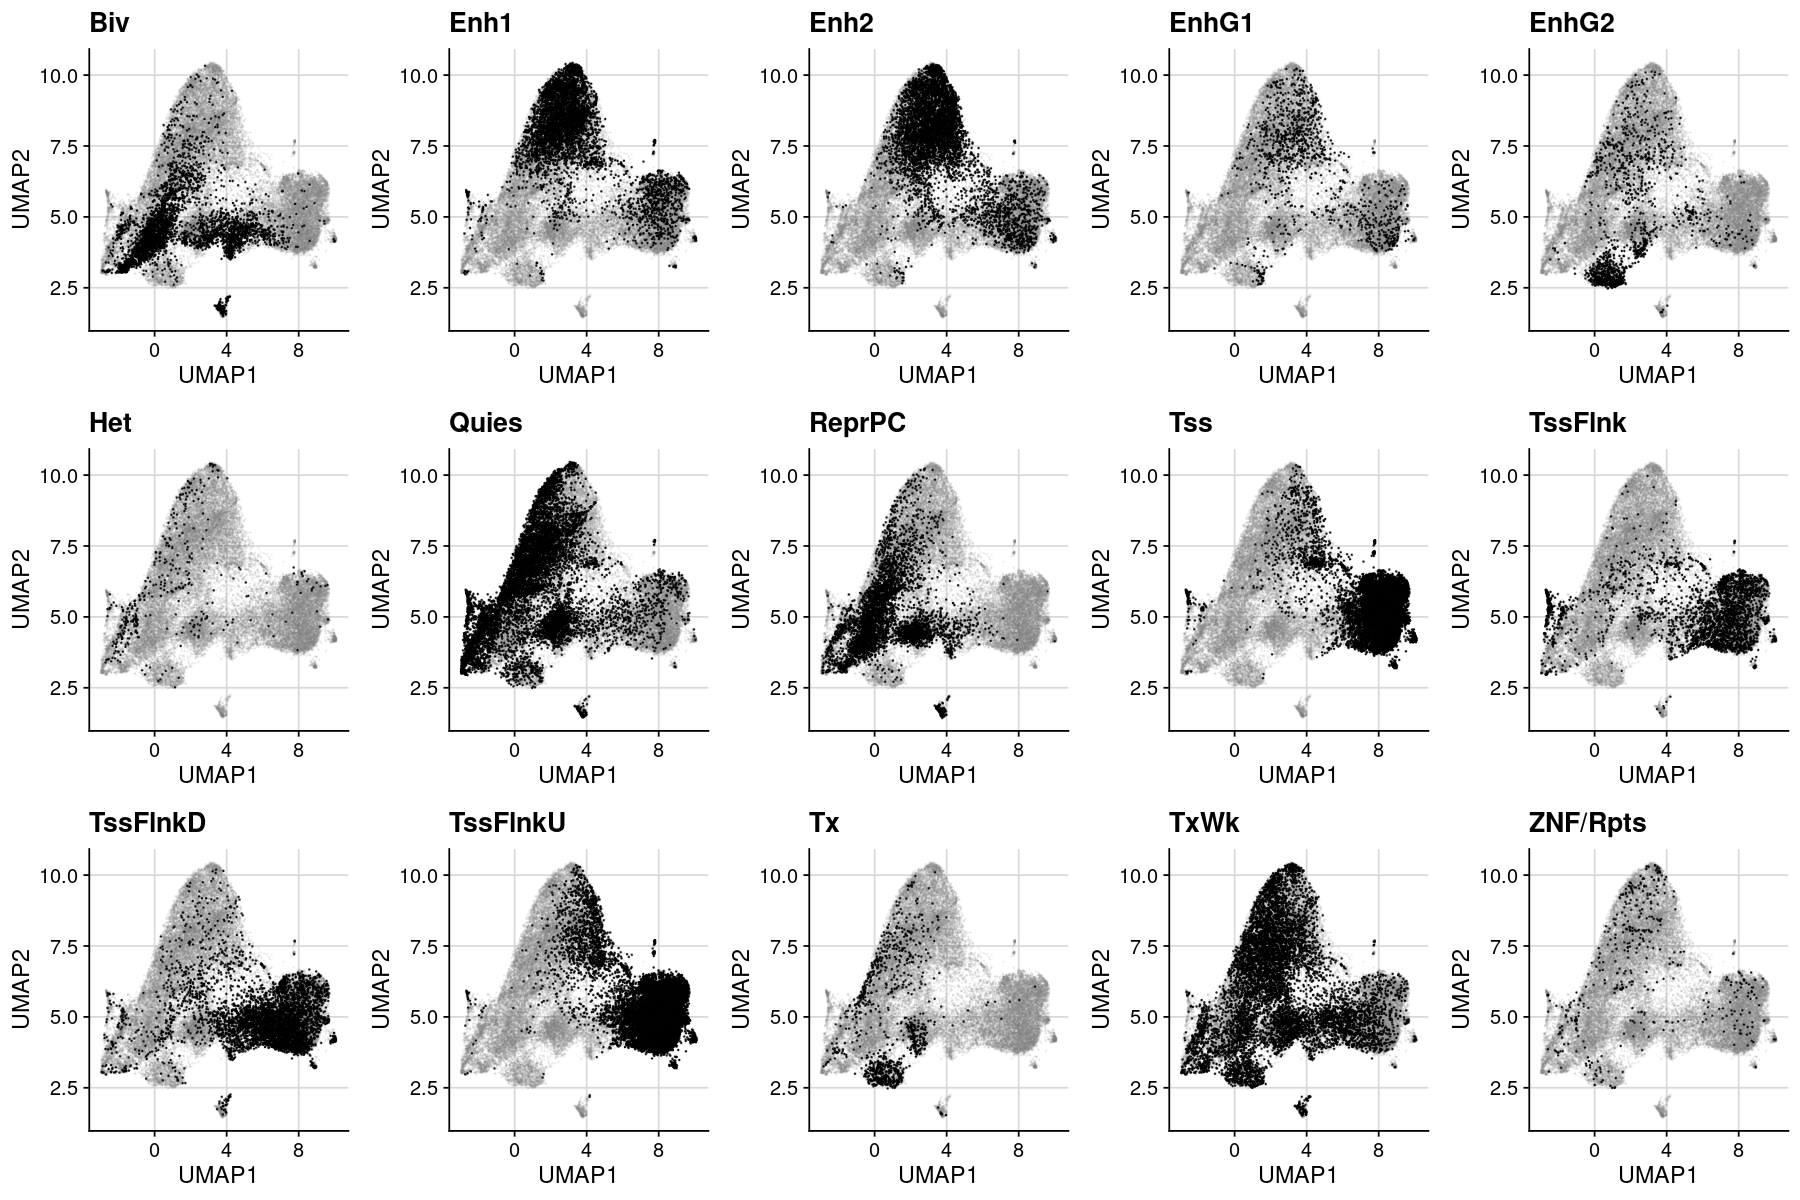

In [33]:
vec_txt_label = names(lst_dat_region_merge)
lst = lapply(vec_txt_label, function(idx){
    ### get tables
    dat = dat_region_umap
    tmp = lst_dat_region_merge[[idx]]

    ### set plot parameters
    txt_title = idx

    ### generate plot
    gpt = ggplot() + 
        geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey50", size = 0.1, alpha = 0.1) + 
        geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color="black",  size = 0.1, alpha = 0.7) +
        theme_cowplot() +
        background_grid() +
        labs(title = txt_title)

    return(gpt)
})
plt = plot_grid(plotlist = lst, ncol = 5)

### show plot
options(repr.plot.height = 10, repr.plot.width = 15)
print(plt)

## Export plots

### Set plot style

In [44]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16),
    strip.text   = element_text(size = 16)
)

```
### set color
dat = tribble(
    ~Group,                ~Color,
    "Proximal:Active",     "#e41a1c",
    "Distal:Active",       "#ff7f00",
    "Distal:Repressive",   "#377eb8",
    "Proximal:Repressive", "#f781bf"
)
dat_annot_color = dat
lst_txt_color = split(dat$Color, dat$Group)
```

In [55]:
### set color dataframe
dat_chromhmm_label = tribble(
  ~State_No, ~Abbreviation, ~Description,                     ~Color_Code, ~RGB_Dec,
  "E1",      "TssFlnk",     "Flanking TSS",                   "#FF4500",   "255,69,0",
  "E2",      "TssFlnkD",    "Flanking TSS downstream",        "#FF4500",   "255,69,0",
  "E3",      "TssFlnkU",    "Flanking TSS upstream",          "#FF4500",   "255,69,0",
  "E4",      "Tss",         "Active TSS",                     "#FF0000",   "255,0,0",
  "E5",      "Enh1",        "Enhancer",                       "#FFDF00",   "255,223,0",
  "E6",      "Enh2",        "Enhancer",                       "#FFDF00",   "255,223,0",
  "E7",      "EnhG1",       "Enhancer in gene",               "#AADF07",   "170,223,7",
  "E8",      "EnhG2",       "Enhancer in gene",               "#AADF07",   "170,223,7",
  "E15",     "Tx",          "Transcription",                  "#008000",   "0,128,0",
  "E9",      "TxWk",        "Weak transcription",             "#3F9A50",   "63,154,80",
  "E10",     "Biv",         "Bivalent",                       "#CD5C5C",   "205,92,92",
  "E11",     "ReprPC",      "Repressed by Polycomb",          "#8937DF",   "137,55,223",
  #"E12",     "Quies",       "Quiescent",                      "#DCDCDC",   "220,220,220",
  "E12",     "Quies",       "Quiescent",                      "#737373",   "220,220,220",
  "E13",     "Het",         "Heterochromatin",                "#4B0082",   "75,0,130",
  "E14",     "ZNF/Rpts",    "ZNF genes repeats",              "#68CDAA",   "104,205,170"
)

### Create a named hex‐vector
lst_txt_color <- set_names(
    dat_chromhmm_label$Color_Code,
    dat_chromhmm_label$Abbreviation
)

### Create a named description
lst_txt_title <- set_names(
    paste0(
        dat_chromhmm_label$Description, "\n", 
        "(", dat_chromhmm_label$Abbreviation, ")"
    ),
    dat_chromhmm_label$Abbreviation
)

### Plot each label separately

In [56]:
vec_txt_label = names(lst_txt_color)
vec_txt_label

[1] "TssFlnk"  "TssFlnkD" "TssFlnkU" "Tss"      "Enh1"     "Enh2"    
 [7] "EnhG1"    "EnhG2"    "Tx"       "TxWk"     "Biv"      "ReprPC"  
[13] "Quies"    "Het"      "ZNF/Rpts"

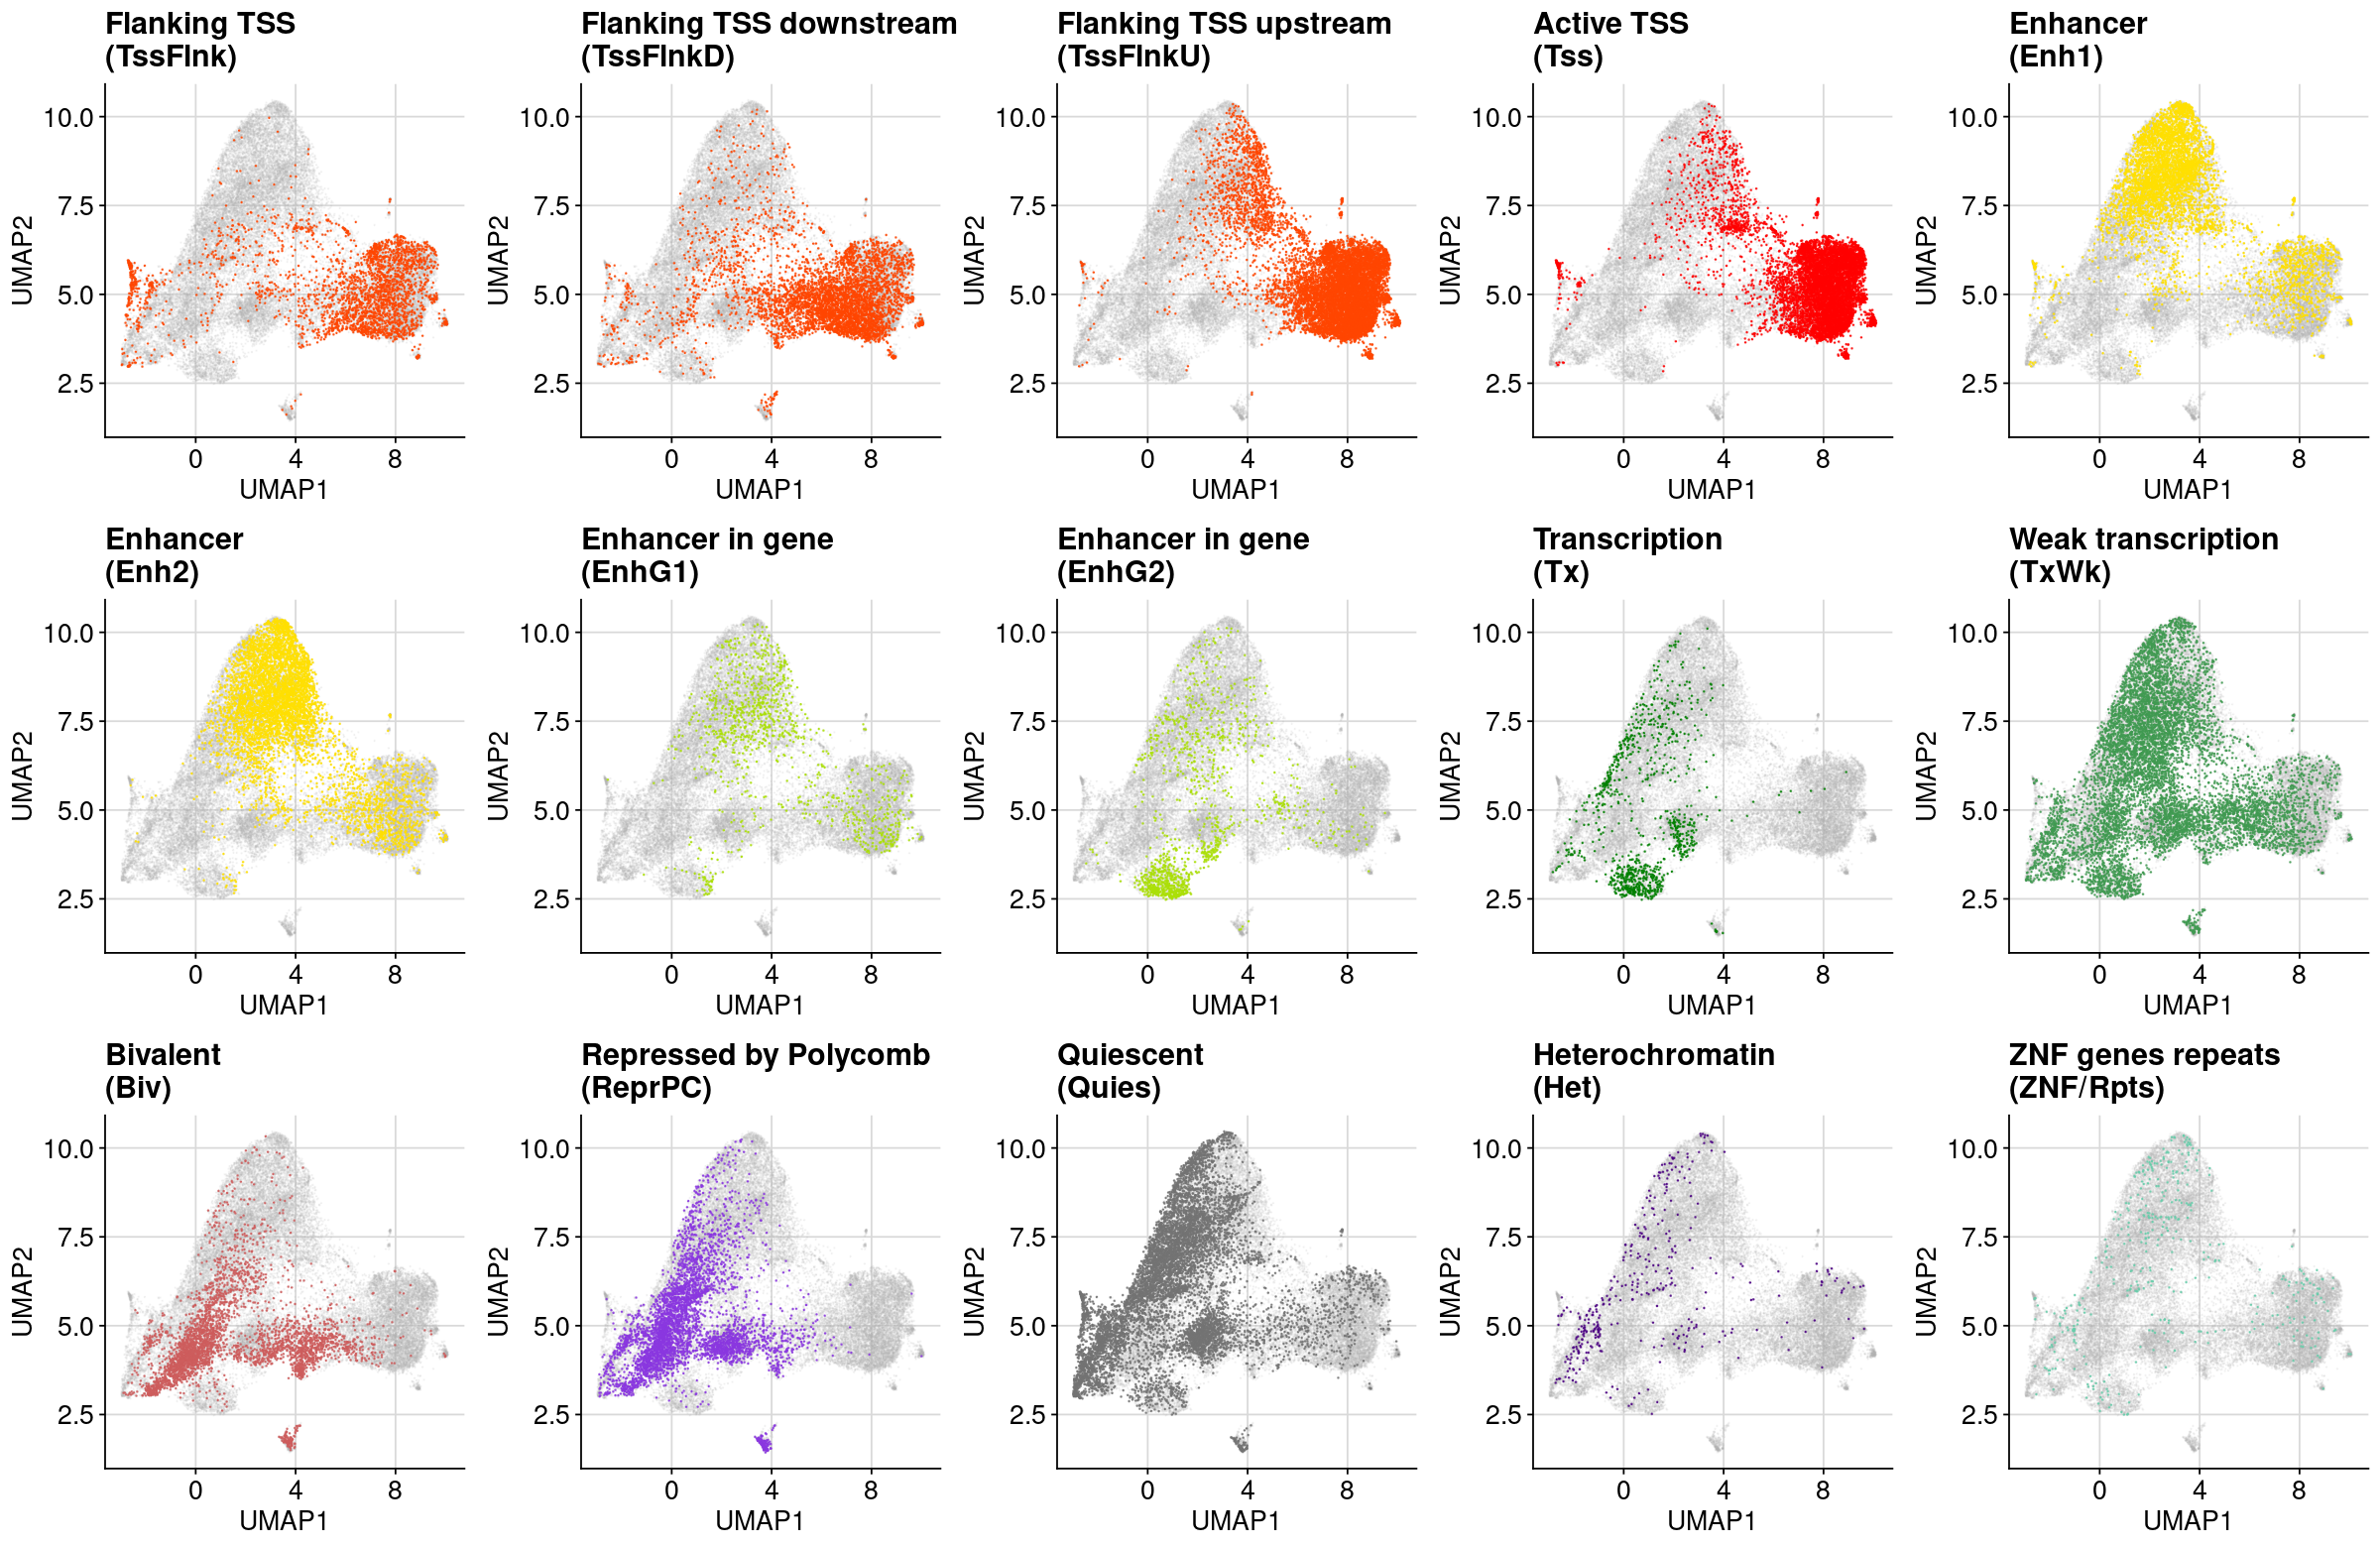

In [57]:
lst = lapply(vec_txt_label, function(idx){
    ### get tables
    dat = dat_region_umap
    tmp = lst_dat_region_merge[[idx]]

    ### set plot parameters
    txt_color = lst_txt_color[[idx]]
    txt_title = lst_txt_title[[idx]]

    ### generate plot
    gpt = ggplot() + 
        geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey70",  size = 0.1, alpha = 0.1) + 
        geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color=txt_color, size = 0.1, alpha = 0.7) +
        theme_cowplot() +
        background_grid() +
        labs(title = txt_title) +
        theme_text
    return(gpt)
})
plt = plot_grid(plotlist = lst, ncol = 5)

### show plot
plt_export_chromhmm_concat = plt
options(repr.plot.height = 13, repr.plot.width = 20)
print(plt)

**Save plot**

In [59]:
plt_export = plt_export_chromhmm_concat
txt_export = "fig.region_umap.astarr_input_overlap.fcc_starrmpracrispr_vote2.scatterplot.label_chromhmm.concat"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 13, width = 20, units = "in")

### this is oversize for github
#txt_fdiry = "./"
#txt_fname = paste(txt_export, "svg", sep = ".")
#txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = 13, width = 20, units = "in")